In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from urllib.parse import quote

# 輸入筆電型號
search_query = input("請輸入筆電型號：")

# 對搜索關鍵詞進行URL編碼
search_query = quote(search_query)

# 配置Selenium的Chrome驅動器路徑（請確保已安裝並設置Chrome驅動器）
driver_path = '/path/to/chromedriver'

# 初始化Chrome驅動器
driver = webdriver.Chrome(executable_path=driver_path)

# 構建Google搜尋URL
url = f"https://www.google.com/search?q={search_query}+gamut+coverage+notebookcheck"

# 使用Chrome驅動器打開Google搜尋頁面
driver.get(url)

# 提取第一項搜尋结果的標題和連結
first_result = driver.find_element(By.XPATH, '//div[@class="yuRUbf"]/a')
title = first_result.text
link = first_result.get_attribute('href')

# 輸出第一項搜尋結果的標題和連結
print("連結:", link)

# 關閉瀏覽器
driver.quit()


請輸入筆電型號：fx516pm


C:\Users\ASUS\AppData\Local\Temp\ipykernel_40584\407785751.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path)


連結: https://www.notebookcheck.net/Asus-TUF-Dash-F15-Laptop-Ampere-with-one-foot-on-the-brake.518015.0.html


In [12]:
#試著先導出一篇文章內容
# 導入 模組(module) 
import requests 
# 導入 BeautifulSoup 模組(module)：解析HTML 語法工具
import bs4

# 文章連結
URL = link
# 設定Header與Cookie
my_headers = {'cookie': 'over18=1;'}
# 發送get 請求 到 notebookcheck
response = requests.get(URL, headers = my_headers)
#  把網頁程式碼(HTML) 丟入 bs4模組分析
soup = bs4.BeautifulSoup(response.text,"html.parser")
## 查找所有html 元素 抓出內容
main_container = soup.find(id='nbc_contentcolumns_1col')
# 把所有文字都抓出來
all_text = main_container.text
# 把整個內容切割透過 "-- " 切割成2個陣列
pre_text = all_text.split('--')[0]
    
# 把每段文字 根據 '\n' 切開
texts = pre_text.split('\n')
# 內容
text = '\n'.join(texts)
print(text)





Asus TUF Dash F15 Laptop: Ampere with one foot on the brakeNot much faster than Turing. Asus put the slowest currently available GeForce RTX 3070 Laptop GPU into its brand-new TUF Dash F15. Find out in our test what this means for performance, power consumption, and emissions (noise, temperature, etc).Florian Glaser, 👁 Florian Glaser (translated by Finn D. Boerne), Published 02/03/2021 🇩🇪 🇳🇱 ...
 🇫🇷 🇪🇸 🇵🇹 🇷🇺 🇮🇹 🇸🇪 Gaming Geforce Tiger Lake Laptop






Unsurprisingly, various TUF Dash F15 SKUs are going to be available. That is of course once Nvidia’s Ampere chips become available in the first place. Its quad-core processor is based on Intel’s brand-new Tiger Lake generation, and the three choices available include the Core i5-11300H (max 4.4 GHz), the Core i7-11370H (max 4.8 GHz), and the Core i7-11375H (max 5.0 GHz). The selection of GPUs will include a GeForce RTX 3060 Laptop and GeForce RTX 3070 Laptop. Three different 15-inch displays will be available, one with a resolution o

In [5]:
def save_to_txt(content, filename):
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(content)

article_content = (text)

# 指定保存的文件名和路徑
output_filename = "content.txt"

# 將文章內容保存為txt文件
save_to_txt(article_content, output_filename)


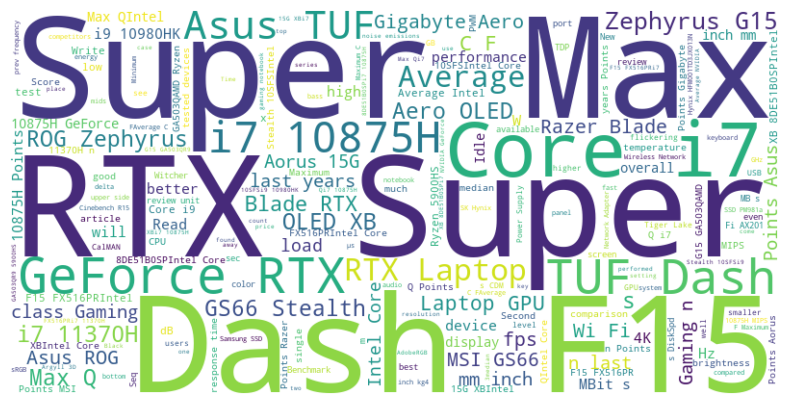

In [6]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 讀取文字檔案
with open('content.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# 產生文字雲
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 繪製文字雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
